In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
data = pd.read_csv('dog_rates_tweets.csv', parse_dates=['created_at'])

In [5]:
regexp = r'(\d+(\.\d+)?)/10'
data['rating'] = data['text'].str.extract(regexp)[0]  
data['rating'] = pd.to_numeric(data['rating'])
data = data[data['rating'] <= 25]  
data = data[data['rating'] >= 0]  

In [6]:
def to_timestamp(date):
    return date.timestamp()
data['timestamp'] = data['created_at'].apply(to_timestamp)
fit = linregress(data['timestamp'], data['rating'])

## Results

In [8]:
data['prediction'] = data['timestamp'] * fit.slope + fit.intercept

In [9]:
data

,id,created_at,text,rating,timestamp,prediction
2,994363623421153280,2018-05-09 23:48:56,This is Louie. He has misplaced his Cheerio. W...,14.0,1.525910e+09,12.624973
7,993889039714578432,2018-05-08 16:23:07,This is Manny. He hasn’t seen your croissant. ...,13.0,1.525797e+09,12.622373
8,993629544463642624,2018-05-07 23:11:58,This is Libby. She leap. 14/10\n(IG: libbythef...,14.0,1.525735e+09,12.620951
24,992198572664860672,2018-05-04 00:25:48,This is Rosie. She thought Coachella was this ...,13.0,1.525394e+09,12.613109
30,991744041351090177,2018-05-02 18:19:39,This is Riley. He’ll be your chauffeur this ev...,13.0,1.525285e+09,12.610619
...,...,...,...,...,...,...
11631,1096203765189726208,2019-02-15 00:25:18,"honorary 15/10 for Oppy, the very good space r...",15.0,1.550190e+09,13.183014
11638,1095730341828915200,2019-02-13 17:04:05,This is George. He doesn’t chew socks. He just...,14.0,1.550077e+09,13.180420
11665,1093636946046242817,2019-02-07 22:25:41,@Panthers @Proud_KCS 13/10 easy,13.0,1.549578e+09,13.168949
11666,1093636812818472960,2019-02-07 22:25:09,RT @GeekandSundry: .@Dog_Rates Announces a New...,13.0,1.549578e+09,13.168949


In [10]:
fit.slope, fit.intercept

(2.2983031752244575e-08, -22.445058882763483)

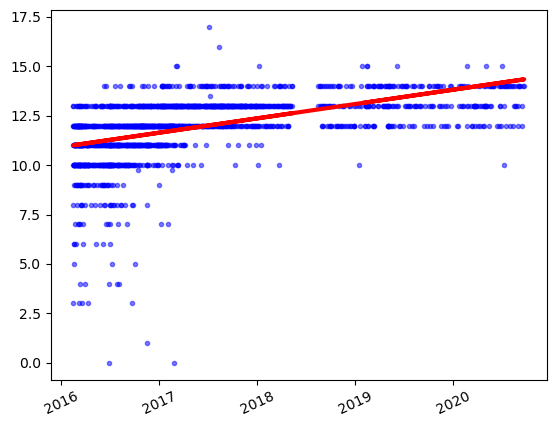

In [11]:
plt.xticks(rotation=25)
plt.plot(data['created_at'], data['rating'], 'b.', alpha=0.5)
plt.plot(data['created_at'], data['prediction'], 'r-', linewidth=3)
plt.show()

Exercise 7

In [21]:
fit.pvalue

3.793798773109108e-121

<function matplotlib.pyplot.show(close=None, block=None)>

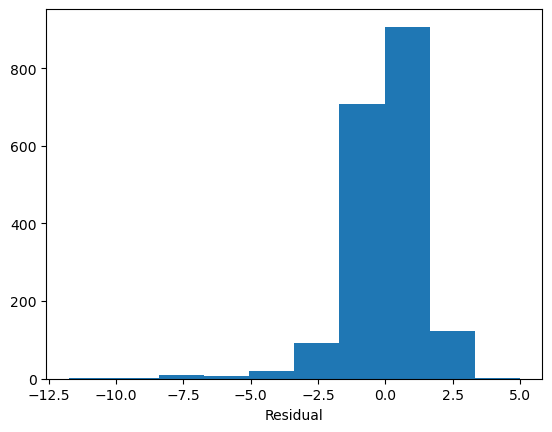

In [27]:
plt.hist(data['rating']-data['prediction'])
plt.xlabel('Residual')
plt.show